```python
id_Cluster='Cluster ' +str(i)#List_Cluster[i]
    S='Cluster '
    Segmento={(S+'2'):'raro',
          (S+'1'):'cliente tipo',
          (S+'4'):'Mayorista',
         ( S+'3'):'Oportunista menor',
         ( S+'0'):'Frecuente y Atractivo',
         ( 'Sin Cluster'):'Sin Cluster'
         }
```

# Intalar paquetes, Abrir data y ajustarla

In [1]:
import statistics 

In [2]:
# =============================================================================
# Importar paquetes y abrir Data
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

#mode function
import statistics 

col_names=pd.read_csv("Data/(column)Facturac_2017_2020.csv",
                    encoding="utf-8",sep=";",nrows=0).columns
types_dict = {col: str for col in col_names}

Data = pd.read_csv("Data/(column)Facturac_2017_2020.csv",
                   encoding="utf-8",sep=";",dtype=types_dict)

In [3]:


Data=Data[Data['Zona de ventas.1']=='Temuco']
print(Data.describe(include='all'))

           Material Tipo de cliente Zona de ventas Zona de ventas.1  \
count          3873            3873           3873             3873   
unique            1               1              1                1   
top     Tradicional            Z004            Sur           Temuco   
freq           3873            3873           3873             3873   

       Oficina de Ventas Unifica Oficina de Ventas Unifica.1  \
count                       3873                        3873   
unique                         1                          87   
top                         T105                  8000580048   
freq                        3873                         352   

       Subtipo de cliente  Cluster      Cliente - Local Cliente - Local.1  \
count                3873     3873                 3873              3873   
unique                  5        3                  324               329   
top      Espec. en Crudos  Clásico  Los Camperos Temuco             58651   
freq           

In [4]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    df=data.copy()
    # Funciones para eliminar los putos y cambiar las , por .
    def change_num_point(x):
        x=str(x)
        return x.replace('.', '')
    def change_num_coma(x):
        x=str(x)
        return x.replace(',', '.')
    for i in ['Kilos Venta KG','Venta Neta CLP','Precio Promedio CLP']:
        df[i]=df[i].apply(change_num_point)
        df[i]=df[i].apply(change_num_coma)
        df[i]=df[i].astype('int64')

        #Separacion fecha
    df['Semana']=df['Año natural/Semana'].str.split('.', expand=True)[[0]]
    df['Año']=df['Año natural/Semana'].str.split('.', expand=True)[[1]]

    df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    
    #
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%d.%m.%Y').date())
    return df

In [5]:
data=Ajuste_data(Data)
data=data[data['Año']>2018]

# Data Clientes 

## CSV Cluster Clientes

In [6]:
Cluster = pd.read_csv("Cluster_clientes.csv",
                          encoding="utf-8",sep=";",dtype={'Cliente - Local.1': 'str'})

In [7]:
Cluster.groupby(['identified_clusters']).mean()#['Dest. Mercancía']

,Frecuencia mes promedio,Delta dia promedio,Skew Delta dia,Kilos Venta promedio,Covarianza del lote,Precio Pond CLP \n Tipo de Semana 4,Kilos Venta KG promedio \n Tipo de Semana 4,Precio Pond CLP \n Tipo de Semana 3,Kilos Venta KG promedio \n Tipo de Semana 3,Precio Pond CLP \n Tipo de Semana 2,Kilos Venta KG promedio \n Tipo de Semana 2,Precio Pond CLP \n Tipo de Semana 1,Kilos Venta KG promedio \n Tipo de Semana 1,Precio Pond CLP \n Tipo de Semana 0,Kilos Venta KG promedio \n Tipo de Semana 0,Tipo de Semana 4,Tipo de Semana 3,Tipo de Semana 2,Tipo de Semana 1,Tipo de Semana 0
identified_clusters,,,,,,,,,,,,,,,,,,,,
0,1.132492,74.996242,1.724328,33.667262,0.412912,5027.718818,37.624661,4757.490532,33.640335,5363.575236,31.077297,4663.869392,33.211240,4368.637384,33.145228,2.661325,2.618108,2.569305,2.783355,2.341021
1,0.476158,90.897087,1.269142,42.390194,0.477496,4141.935076,43.366314,4199.639803,41.243912,4520.672224,41.180348,4121.131366,43.584421,3695.251121,43.552589,1.673032,1.750651,1.516846,1.945296,1.473177
2,0.312500,97.800000,1.472258,981.000000,0.604660,3452.740945,820.750000,3452.740945,820.750000,4414.770340,1248.000000,3282.788835,73.000000,2660.663660,1141.250000,0.833333,0.833333,1.000000,0.000000,1.500000
3,0.169912,249.479706,0.354905,45.088574,0.396707,3225.784268,35.688302,3303.206709,34.584722,3259.745299,35.404969,3273.979315,36.120000,3066.205748,36.643519,0.536420,0.561111,0.519753,0.611111,0.453704
4,0.305069,143.597477,1.045115,243.060051,1.074260,3938.337636,221.127152,3787.693941,272.854945,4294.480423,184.952381,3865.839474,199.239621,3283.566955,235.923199,1.817781,1.935226,1.528388,2.033272,1.581929


# Agregar columna de cluster a las ventas

In [8]:
data.columns

Index(['Material', 'Tipo de cliente', 'Zona de ventas', 'Zona de ventas.1',
       'Oficina de Ventas Unifica', 'Oficina de Ventas Unifica.1',
       'Subtipo de cliente', 'Cluster', 'Cliente - Local', 'Cliente - Local.1',
       'Mes', 'Año natural/Semana', 'Día natural', 'Día de la semana',
       'Kilos Venta KG', 'Venta Neta CLP', 'Precio Promedio CLP', 'Semana',
       'Año'],
      dtype='object')

In [9]:
Cluster.columns

Index(['Cliente - Local.1', 'Oficina de Ventas Unifica', 'Subtipo de cliente',
       'Cluster BW', 'Frecuencia mes promedio', 'Delta dia promedio',
       'Skew Delta dia', 'Kilos Venta promedio', 'Covarianza del lote',
       'Precio Pond CLP \n Tipo de Semana 4',
       'Kilos Venta KG promedio \n Tipo de Semana 4',
       'Precio Pond CLP \n Tipo de Semana 3',
       'Kilos Venta KG promedio \n Tipo de Semana 3',
       'Precio Pond CLP \n Tipo de Semana 2',
       'Kilos Venta KG promedio \n Tipo de Semana 2',
       'Precio Pond CLP \n Tipo de Semana 1',
       'Kilos Venta KG promedio \n Tipo de Semana 1',
       'Precio Pond CLP \n Tipo de Semana 0',
       'Kilos Venta KG promedio \n Tipo de Semana 0', 'Tipo de Semana 4',
       'Tipo de Semana 3', 'Tipo de Semana 2', 'Tipo de Semana 1',
       'Tipo de Semana 0', 'identified_clusters'],
      dtype='object')

## MERGE

In [10]:
DF_ventas=pd.merge(Cluster[['Cliente - Local.1','identified_clusters']] , data  
     , how='right')

`DF_ventas` sera el data frame que posee las ventas con una columna llamada `identified_clusters` con la cual se filtrarán las ventas que tiene cada cluster de clientes

# Etiquetado de los clusters

In [29]:
Col_S='Cluster de Clientes'
def categoria(x):
        Segmento={'2':'raro',
                  '1':'cliente tipo',
                  '4':'Mayorista',
                  '3':'Oportunista menor',
                  '0':'Frecuente y Atractivo',
                     'Sin Cluster':'Sin Cluster'}
        x=str(x)
        x=x[0]
        return Segmento[x]#.replace('.', '')
    

#DF_ventas['identified_clusters']=DF_ventas['identified_clusters'].apply(categoria)

# Analisis del volumne de cada cluster
`DF_ventas`

## Calculo del movimiento total de cada semana 

In [12]:
List_Cluster=Cluster.identified_clusters.unique()
List_Cluster

array([1, 0, 3, 4, 2], dtype=int64)

## Volumen de cada mes de cada año

In [13]:
#====================================================================================
# Ventas  de cada mes
#====================================================================================
df_i=DF_ventas.copy()
#==========================================================
# Defino el primer meses y año
#==========================================================

#año de inicio
#ano_in=df_i['Día natural'].min().year
ano_in=2019


# mes de inicio
mes_in=df_i['Día natural'].min().month
mes_in=1

#---------------------------------------------------------------------------
# values
date_v=list(df_i.groupby(['Mes','Año'],
                         sort=True).sum()['Kilos Venta KG'])

#index
date_i=list((df_i.groupby(['Mes','Año'],
                          sort=True).sum()['Kilos Venta KG']).index)
date_i


#------------------------------
#fechas listado con todas las fechas a corroborar
#------------------------------
fechas=list()
for a in range(ano_in,2022):
    if a==ano_in:
        for m in range(mes_in,13):
            t=tuple((str(m),a))
            fechas.append(t)     
    elif(a==2021):
        for m in range(1,3):
            t=tuple((str(m),a))
            fechas.append(t)
    else:
        for m in range(1,13):
            t=tuple((str(m),a))
            fechas.append(t)


DF_Volumen_total=((pd.merge(pd.DataFrame({'Date':fechas}),
                pd.DataFrame({'Date':date_i,'Volumen Total KG':date_v})
             , how='left')))
DF_Volumen_total

,Date,Volumen Total KG
0,"(1, 2019)",2145
1,"(2, 2019)",2708
2,"(3, 2019)",2000
3,"(4, 2019)",3321
4,"(5, 2019)",1490
5,"(6, 2019)",5936
6,"(7, 2019)",2876
7,"(8, 2019)",4198
8,"(9, 2019)",3229
9,"(10, 2019)",5967


## Procedimiento  % del volumen

### Estrucutra par 1 caso

## Generalización

In [14]:

def data_vol_clust(df_i,id_Cluster):
    #=========================================================
    # Tomo las ventas del cluster i
    #==================================================================
    #i=0
    #id_Cluster=#List_Cluster[i]
    #print(id_Cluster)

    #df_i=DF_ventas[DF_ventas[col_Clust]==id_Cluster].copy()

    #==========================================================
    # Defino el primer meses y año
    #==========================================================

    #año de inicio
    #ano_in=df_i['Día natural'].min().year
    ano_in=2019


    # mes de inicio
    #int((str(df_i['Día natural'].min()))[5:7])
    mes_in=df_i['Día natural'].min().month
    mes_in=1

    #---------------------------------------------------------------------------
    # values
    #---------------------------------------------------------------------------

    date_v=list(df_i.groupby(['Mes','Año'],
                             sort=True).sum()['Kilos Venta KG'])

    #index
    date_i=list((df_i.groupby(['Mes','Año'],
                              sort=True).sum()['Kilos Venta KG']).index)
    date_i


    #------------------------------
    #
    #------------------------------
    fechas=list()
    for a in range(ano_in,2022):
        if a==ano_in:
            for m in range(mes_in,13):
                t=tuple((str(m),a))
                fechas.append(t)     
        elif(a==2021):
            for m in range(1,3):
                t=tuple((str(m),a))
                fechas.append(t)
        else:
            for m in range(1,13):
                t=tuple((str(m),a))
                fechas.append(t)


    DF_i=((pd.merge(pd.DataFrame({'Date':fechas}),
                    pd.DataFrame({'Date':date_i,'Volumen de venta KG':date_v})
                 , how='left')))

    DF_i['Porcentaje de las ventas KG']=\
    DF_i['Volumen de venta KG']/DF_Volumen_total['Volumen Total KG']

    DF_i['mes']=DF_i['Date'].apply(lambda x : x[0])

    V_mean=DF_i.groupby('mes').mean()#['Volumen de venta KG']

    DF_i_R=pd.DataFrame({'Mes':list((V_mean).index),
                         'Volumen de venta promedio KG':V_mean['Volumen de venta KG'],
                         'Porcentaje promedio de \n   las ventas del mes [%]':
                         V_mean['Porcentaje de las ventas KG']*100,
                         'Cluster de Clientes':[id_Cluster 
                                                for x in range(len(list((V_mean).index)))]    
    })
    DF_i_R['Mes']=DF_i_R['Mes'].astype('int64')
    DF_i_R.sort_values(by=['Mes'])
    return(DF_i_R)

In [73]:
col_Clust='identified_clusters'
List_Cluster=Cluster.identified_clusters.unique()

id_Cluster='Sin Cluster'#List_Cluster[i]
df_i=DF_ventas[DF_ventas[col_Clust].isnull()].copy()
Cluster_df_vol=data_vol_clust(df_i,id_Cluster)
for i in range(0,5):
    id_Cluster='Cluster ' +str(i)#List_Cluster[i]
    S='Cluster '
    Segmento={(S+'2'):'raro',
          (S+'1'):'cliente tipo',
          (S+'4'):'Mayorista',
         ( S+'3'):'Oportunista menor',
         ( S+'0'):'Frecuente y Atractivo',
         ( 'Sin Cluster'):'Sin Cluster'
         }
    id_Cluster=Segmento[id_Cluster]
    
    
    df_i=DF_ventas[DF_ventas[col_Clust]==i].copy()
    Cluster_df_vol=pd.concat([Cluster_df_vol,data_vol_clust(df_i,id_Cluster)])
Cluster_df_vol.head(5)

,Mes,Volumen de venta promedio KG,Porcentaje promedio de \n las ventas del mes [%],Cluster de Clientes
mes,,,,
1,1,31.000000,0.737699,Sin Cluster
10,10,84.000000,1.621785,Sin Cluster
11,11,228.000000,3.611677,Sin Cluster
12,12,75.500000,2.041431,Sin Cluster
2,2,64.333333,1.373593,Sin Cluster


In [16]:
Cluster_df_vol.columns

Index(['Mes', 'Volumen de venta promedio KG',
       'Porcentaje promedio de \n   las ventas del mes [%]',
       'Cluster de Clientes'],
      dtype='object')

In [ ]:
#DF_ventas['identified_clusters']=DF_ventas['identified_clusters'].apply(categoria)

In [ ]:
Col_S='Cluster de Clientes'

In [48]:
Cluster_df_vol[Col_S].unique()

array(['Sin Cluster', 'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3',
       'Cluster 4'], dtype=object)

### Etiquetado de los clusters

In [71]:
Col_S='Cluster de Clientes'
def categoria(x):
    S='Cluster '
    Segmento={(S+'2'):'raro',
              (S+'1'):'cliente tipo',
              (S+'4'):'Mayorista',
             ( S+'3'):'Oportunista menor',
             ( S+'0'):'Frecuente y Atractivo',
             ( 'Sin Cluster'):'Sin Cluster'
             }
    
    #if(isinstance(x, int)):
        #x=str(x)
        #print(x=x[0])
    #else:
        #print(x)
    return Segmento[x]
    

Cluster_df_vol[Col_S].apply(categoria)
#DF_ventas['identified_clusters']=
#DF_ventas['identified_clusters'].apply(categoria)

mes
1     Sin Cluster
10    Sin Cluster
11    Sin Cluster
12    Sin Cluster
2     Sin Cluster
3     Sin Cluster
4     Sin Cluster
5     Sin Cluster
6     Sin Cluster
7     Sin Cluster
8     Sin Cluster
9     Sin Cluster
Name: Cluster de Clientes, dtype: object

C:\Users\user\anaconda3\envs\Prophet\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 9 rows containing missing values.


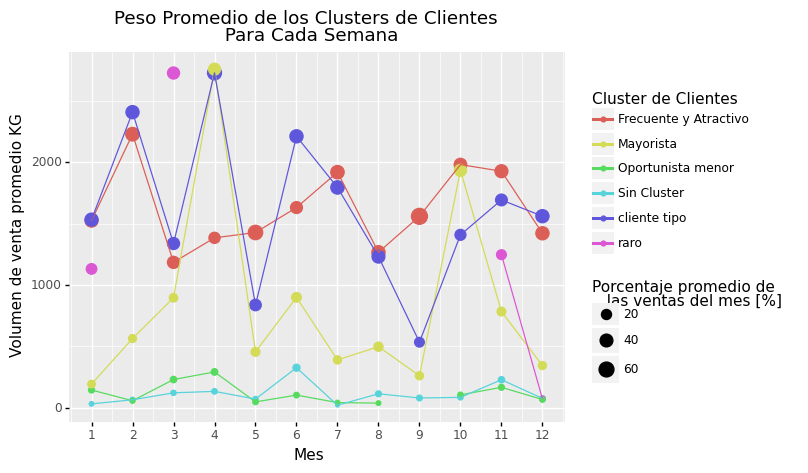

<ggplot: (123046527028)>

In [74]:
X_brak=[i for i in range(1,13)]
X_brak_S=[str(i) for i in range(1,13)]
GRaph_Disp_cluster=(
    ggplot(Cluster_df_vol, aes(x='Mes',
                               y= 'Volumen de venta promedio KG'))\
                #+ labs(y='Disposición a pagar',x='Tipo de Semana')\
                + geom_point(aes(color='Cluster de Clientes',
                                 size='Porcentaje promedio de \n   las ventas del mes [%]'
                     ))\
                 + geom_line(aes(color='Cluster de Clientes'))\
                +ggtitle(('Peso Promedio de los Clusters de Clientes'+
                          ' \n Para Cada Semana'))\
                #+theme(axis_text_x = element_text(angle=90, hjust=1))
                       #,figure_size=(15,8)
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )
GRaph_Disp_cluster

### Volumnes Segmento pequeños

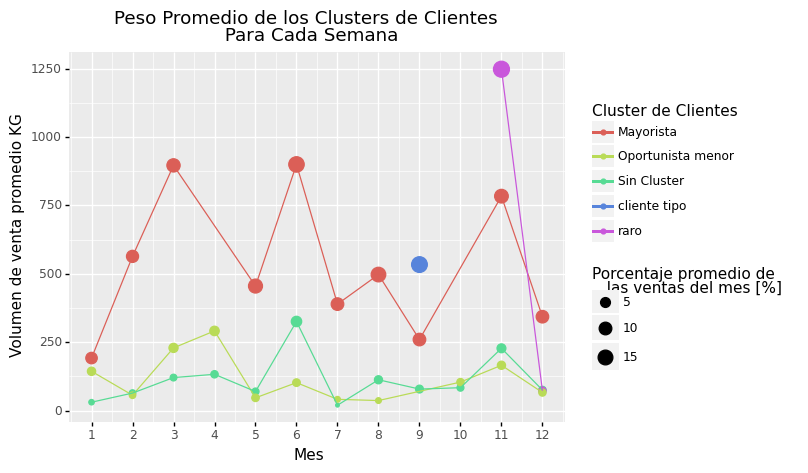

<ggplot: (123046710137)>

In [75]:
X_brak=[i for i in range(1,13)]
X_brak_S=[str(i) for i in range(1,13)]
GRaph_Disp_cluster=(
    ggplot(Cluster_df_vol[Cluster_df_vol['Porcentaje promedio de \n   las ventas del mes [%]']<20], aes(x='Mes',
                               y= 'Volumen de venta promedio KG'))\
                #+ labs(y='Disposición a pagar',x='Tipo de Semana')\
                + geom_point(aes(color='Cluster de Clientes',
                                 size='Porcentaje promedio de \n   las ventas del mes [%]'
                     ))\
                 + geom_line(aes(color='Cluster de Clientes'))\
                +ggtitle(('Peso Promedio de los Clusters de Clientes'+
                          ' \n Para Cada Semana'))\
                #+theme(axis_text_x = element_text(angle=90, hjust=1))
                       #,figure_size=(15,8)
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )
GRaph_Disp_cluster

## Porcentajes de las ventas volumen

C:\Users\user\anaconda3\envs\Prophet\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 9 rows containing missing values.


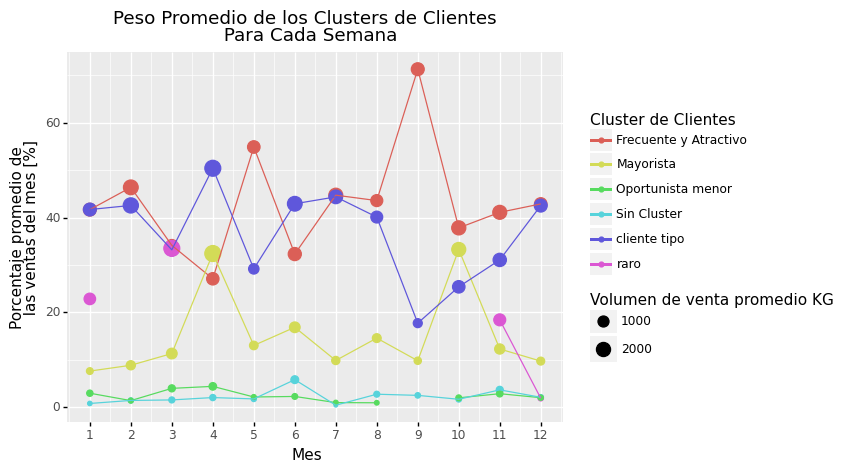

<ggplot: (123046884259)>

In [76]:
X_brak=[i for i in range(1,13)]
X_brak_S=[str(i) for i in range(1,13)]
GRaph_Disp_cluster=(
    ggplot(Cluster_df_vol, aes(x='Mes',
                               y= 'Porcentaje promedio de \n   las ventas del mes [%]' ))\
                #+ labs(y='Disposición a pagar',x='Tipo de Semana')\
                + geom_point(aes(color='Cluster de Clientes',
                                size='Volumen de venta promedio KG'
                     ))\
                 + geom_line(aes(color='Cluster de Clientes'))\
                +ggtitle(('Peso Promedio de los Clusters de Clientes'+
                          ' \n Para Cada Semana'))\
                #+theme(axis_text_x = element_text(angle=90, hjust=1))
                       #,figure_size=(15,8)
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )
GRaph_Disp_cluster

# Cantidad de clientes por cluster

In [77]:
col_Clust='identified_clusters'
# Clientes que no poseen cluster
Cant_clientes_sin_clust=\
len(DF_ventas[DF_ventas[col_Clust].isnull()
             ].copy()['Cliente - Local.1'].unique())

#Numero total de clientes
N_total_clientes=len(data['Cliente - Local.1'].unique())

x=Cluster.groupby('identified_clusters').count()['Cliente - Local.1']

x_p=[x[i]/(N_total_clientes)*100for i in range(len(list(x)))]
x_p=[ str("%.2f" % (round(int(x_p[i]),2))+' %')  for i in range(len(list(x)))]

#DF de los clientes que tiene cluster
a=pd.DataFrame({'Cluster de Clientes':list(x.index)
              ,'Cantidad de clientes':list(x)
                ,'Porcentaje de los clientes':x_p
                
               })
a['Cantidad de clientes']=a['Cantidad de clientes'].astype('int64')

#DF de los sin custer
b=pd.DataFrame({'Cluster de Clientes':['Sin Cluster']
              ,'Cantidad de clientes':[Cant_clientes_sin_clust]
                ,'Porcentaje de los clientes':[
                     str("%.2f" % round((Cant_clientes_sin_clust/N_total_clientes)*100,2)+' %')
                ]
                
               })

b['Cantidad de clientes']=b['Cantidad de clientes'].astype('int64')

z=pd.concat([a,b])




In [78]:
Gplot=(
        ggplot((z[z['Cluster de Clientes']!='2']), aes(x='Cluster de Clientes',y='Cantidad de clientes'
                         ))\
                    #+ geom_point()\
                    + geom_col(fill='blue')\
                    +ggtitle('Cantidad de Clientes '+' \n Por Cluster')\
                    + labs(x='Cluster de Clientes')
                   #+theme(axis_text_x = element_text(angle=90, hjust=1))\

        + geom_text(aes(label='Porcentaje de los clientes'),   # new
         position=position_dodge(width=0.9),
         size=8, va='bottom')
            
        + geom_text(aes(label='Cantidad de clientes'),   # new
         position=position_dodge(width=0.9),
         size=8, va='top',ha='center',color='red')
            )
Gplot

TypeError: '<' not supported between instances of 'str' and 'int'

In [22]:
z.dtypes

Cluster de Clientes           object
Cantidad de clientes           int64
Porcentaje de los clientes    object
dtype: object

In [23]:
z

,Cluster de Clientes,Cantidad de clientes,Porcentaje de los clientes
0,0,51,19.00 %
1,1,92,35.00 %
2,2,1,0.00 %
3,3,30,11.00 %
4,4,13,5.00 %
0,Sin Cluster,70,27.24 %


In [24]:
Gplot=(
        ggplot((z[z['Cluster de Clientes']!='2']), aes(x='Cluster de Clientes',y='Cantidad de clientes'
                         ))\
                    #+ geom_point()\
                    + geom_point()
                   #+theme(axis_text_x = element_text(angle=90, hjust=1))\

)
Gplot

TypeError: '<' not supported between instances of 'str' and 'int'

# PDF Graficos

In [79]:

save_as_pdf_pages([GRaph_Disp_cluster],'(ETIQUETADO) Caracterisitcas Cluster vol y cant clientes .pdf')

C:\Users\user\anaconda3\envs\Prophet\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: (ETIQUETADO) Caracterisitcas Cluster vol y cant clientes .pdf
C:\Users\user\anaconda3\envs\Prophet\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 9 rows containing missing values.


C:\Users\user\anaconda3\envs\Prophet\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 9 rows containing missing values.


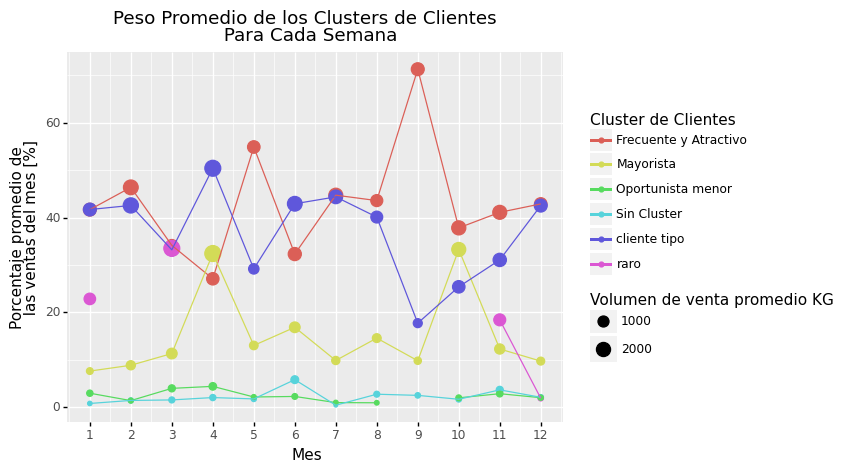

<ggplot: (123046884259)>

In [80]:
GRaph_Disp_cluster